<a href="https://colab.research.google.com/github/jorgeiv500/Logistica/blob/master/profeta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from fbprophet import Prophet

In [0]:
df = pd.read_csv('maracuyaclase.csv',';')
df.tail()

,ds,y
34,2018-11-01,240.0
35,2018-12-01,141.6
36,2019-01-01,114.0
37,2019-02-01,92.0
38,2019-03-01,83.6


In [0]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=9,freq='M')
future.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
43,2019-07-31
44,2019-08-31
45,2019-09-30
46,2019-10-31
47,2019-11-30


In [0]:
forecast = m.predict(future)
print(forecast)
 

           ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2016-01-01   81.682767    1.358676   81.683841    81.682767    81.682767   
1  2016-02-01   84.253450   -4.408429   80.813901    84.253450    84.253450   
2  2016-03-01   86.658283   52.619842  132.356064    86.658283    86.658283   
3  2016-04-01   89.228967   33.572730  116.757545    89.228967    89.228967   
4  2016-05-01   91.716725   46.805949  129.368569    91.716725    91.716725   
5  2016-06-01   94.287409   73.780473  161.166253    94.287409    94.287409   
6  2016-07-01   96.775167   86.468063  170.476028    96.775167    96.775167   
7  2016-08-01   99.345851   31.803854  112.727032    99.345851    99.345851   
8  2016-09-01  101.916534   81.783186  160.082943   101.916534   101.916534   
9  2016-10-01  104.404292   42.096518  125.230379   104.404292   104.404292   
10 2016-11-01  106.974976   80.663869  162.606877   106.974976   106.974976   
11 2016-12-01  109.462734   97.310711  175.424619   

In [0]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
43,2019-07-31,192.667751,149.130573,230.886704
44,2019-08-31,37.481779,-2.529428,77.819671
45,2019-09-30,218.255235,178.709727,260.949657
46,2019-10-31,453.706679,412.601651,492.638339
47,2019-11-30,152.657073,109.505546,195.620491


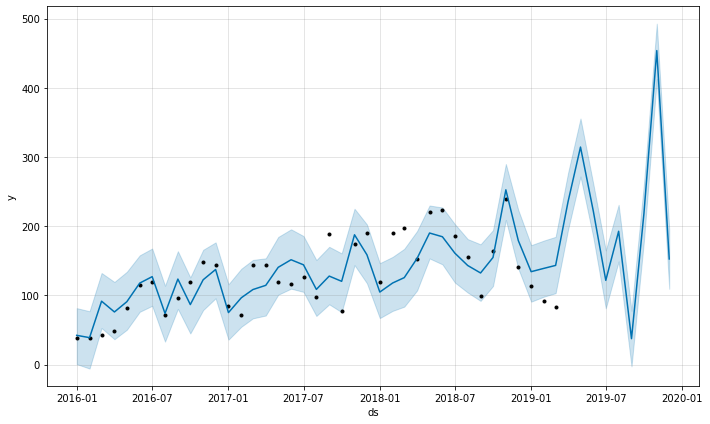

In [0]:
fig1 = m.plot(forecast)

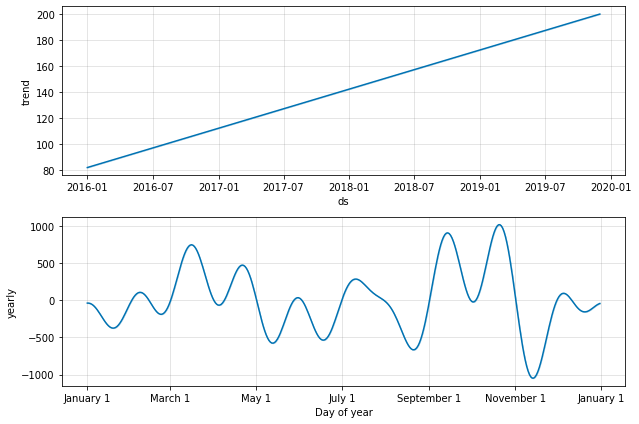

In [0]:
fig2 = m.plot_components(forecast)

In [0]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

figu = plot_plotly(m, forecast)  # This returns a plotly Figure

py.iplot(figu)

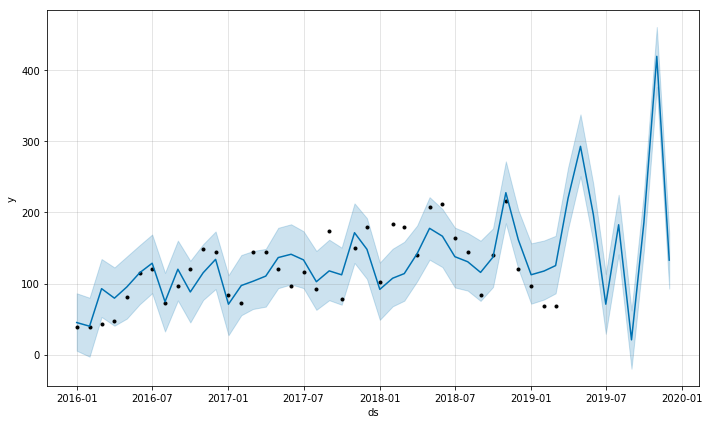

In [0]:
future = m.make_future_dataframe(periods=9, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)

In [0]:
from fbprophet.diagnostics import cross_validation
df_cv=cross_validation(m,horizon='9')
df_cv.head()
print(df_cv)

INFO:fbprophet:Making 27 forecasts with cutoffs between 2016-12-31 23:59:59.999999991 and 2019-02-28 23:59:59.999999991
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 16.
INFO:fbprophet:n_changepoints great

           ds        yhat  yhat_lower  yhat_upper      y  \
0  2017-01-01  -16.638489  -16.638490  -16.638488   84.0   
1  2017-02-01  -59.317588  -61.345443  -56.430003   72.0   
2  2017-03-01   97.990333   97.272244   98.650605  144.0   
3  2017-04-01   69.475580   68.814610   70.124925  144.0   
4  2017-05-01  203.146654  202.328161  204.207056  120.0   
5  2017-06-01  211.594476  211.594476  211.594476  116.0   
6  2017-07-01  261.981364  261.517259  262.464446  126.8   
7  2017-08-01  202.245063  201.263639  203.132842   98.0   
8  2017-09-01  250.874307  250.297195  251.585403  188.4   
9  2017-10-01  287.006801  285.986630  288.044113   78.0   
10 2017-11-01  640.197627  640.065955  640.354981  174.0   
11 2017-12-01  153.496320  140.478061  167.381151  189.6   
12 2018-01-01  117.826592  104.361109  132.726469  120.0   
13 2018-02-01  110.818720   97.900460  125.006801  190.0   
14 2018-03-01  188.080888  168.425609  206.819676  198.0   
15 2018-04-01  198.514725  177.820828  2

In [0]:
from fbprophet.diagnostics import performance_metrics
df_p=performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,00:00:00.000000,17459.065998,132.132759,94.630437,0.802172,0.453573,0.185185
